<a href="https://colab.research.google.com/github/CharlotteY2003/American-Sign-Language/blob/main/American_Sign_Language_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, image_dataset_from_directory, img_to_array, load_img
import os
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Importation

In [ ]:
print(os.listdir('./drive/MyDrive/AmericanSignLanguage/signs'))

['23', '8', '5', '7', '6', '3', '9', '25', '24', '4', '15', '21', '18', '20', '17', '14', '16', '2', '22', '19', '10', '11', '0', '1', '12', '13']


In [ ]:
data_dir = './drive/MyDrive/AmericanSignLanguage/signs'
deleted = 0

for folder in os.listdir(data_dir):
  file_path = os.path.join(data_dir,folder)
  for file in file_path:
    if (file.endswith('jpg')):
      try:
        image = open(os.path.join(file_path,file))
        image.verify()
      except:
        deleted+=1
        os.remove(file)
      finally:
        image.close()

print('Number of images deleted: ', deleted)

Number of images deleted:  0


In [ ]:
training_data = image_dataset_from_directory(data_dir,label_mode='int', color_mode='grayscale', seed=11,validation_split=.2,
                                             subset='training', image_size=(256,256))
val_data = image_dataset_from_directory(data_dir, label_mode='int', color_mode='grayscale', seed=11, validation_split=.2,
                                        subset='validation', image_size=(256,256))


test_data = val_data.skip(int(.7 * 164)) #total num of files/batch size = 164
val_data = val_data.take(int(.7 * 164))

Found 26207 files belonging to 26 classes.
Using 20966 files for training.
Found 26207 files belonging to 26 classes.
Using 5241 files for validation.


In [ ]:
print(len(test_data))

50


In [ ]:
print(len(val_data))

114


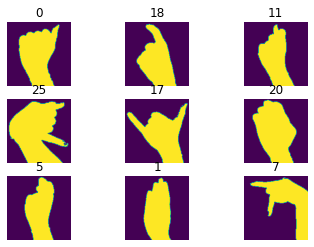

In [ ]:
for images, labels in training_data.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    img = images[i].numpy().astype('uint8')
    img = img.reshape(256,256)
    plt.imshow(img)
    plt.title(int(labels[i]))
    plt.axis('off')

plt.show()

#Data Preprocessing

In [ ]:
batch_size = 32

In [ ]:
train_gen = ImageDataGenerator(rotation_range=.3,width_shift_range=1, height_shift_range=1,
                               dtype='float32', rescale=1/255.0)
val_gen = ImageDataGenerator(rotation_range=.3,width_shift_range=1, height_shift_range=1,
                               dtype='float32', rescale=1/255.0)

Found 26207 images belonging to 26 classes.


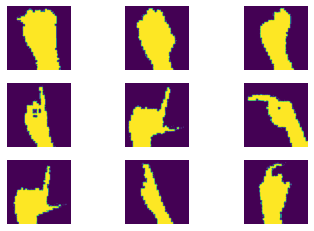

In [ ]:
samp_ds = train_gen.flow_from_directory(data_dir,color_mode='grayscale', seed=11, subset='training')
images, labels = samp_ds[0]

for i in range(9):
  plt.subplot(3,3,i+1)
  img = images[i].astype('uint8')
  img = img.reshape(256,256)
  plt.imshow(img)
  plt.axis('off')

plt.show()

#Model Building

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), activation='relu', kernel_initializer='he_uniform', 
                 input_shape=(256,256,1), padding='same'))
model.add(MaxPool2D(padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D(padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D(padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), strides=(2,2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D(padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size=(3,3), strides=(2,2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D(padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(728, kernel_size=(3,3), strides=(2,2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D(padding='same'))
model.add(Flatten())

model.add(Dense(1028, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(26, activation='softmax', kernel_initializer='he_uniform'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train, Test, and Evaluation

In [ ]:
es = EarlyStopping(patience=1, restore_best_weights=True)

In [ ]:
history = model.fit(training_data,validation_data=val_data, batch_size=batch_size, epochs=10, verbose=1, callbacks=[es], steps_per_epoch=100)

Epoch 1/10
100/100 [==============================] - 151s 1s/step - loss: 1.2441 - accuracy: 0.6755 - val_loss: 5.1113 - val_accuracy: 0.1971
Epoch 2/10
100/100 [==============================] - 128s 1s/step - loss: 0.1529 - accuracy: 0.9616 - val_loss: 1.0981 - val_accuracy: 0.7401
Epoch 3/10
100/100 [==============================] - 126s 1s/step - loss: 0.1042 - accuracy: 0.9688 - val_loss: 0.2590 - val_accuracy: 0.9471
Epoch 4/10
100/100 [==============================] - 125s 1s/step - loss: 0.1269 - accuracy: 0.9646 - val_loss: 0.2038 - val_accuracy: 0.9589
Epoch 5/10
100/100 [==============================] - 965s 10s/step - loss: 0.1011 - accuracy: 0.9742 - val_loss: 0.0455 - val_accuracy: 0.9868
Epoch 6/10
100/100 [==============================] - 931s 9s/step - loss: 0.0693 - accuracy: 0.9811 - val_loss: 0.0369 - val_accuracy: 0.9923
Epoch 7/10
100/100 [==============================] - 448s 4s/step - loss: 0.0400 - accuracy: 0.9908 - val_loss: 0.0445 - val_accuracy: 0.991

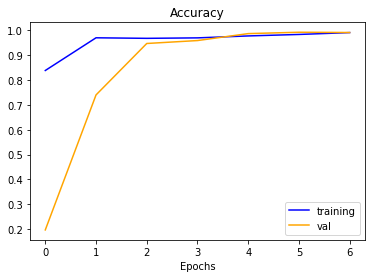

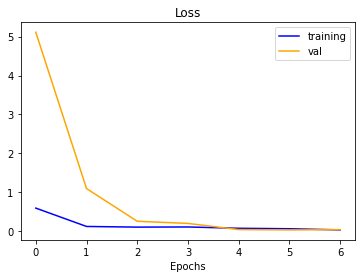

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, color='blue', label='training')
plt.plot(val_acc, color='orange', label='val')
plt.legend()
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.show()

plt.plot(loss, color='blue', label='training')
plt.plot(val_loss, color='orange', label='val')
plt.legend()
plt.xlabel('Epochs')
plt.title('Loss')
plt.show()

In [ ]:
print(model.evaluate(test_data))

50/50 [==============================] - 15s 186ms/step - loss: 0.0434 - accuracy: 0.9893
[0.04339022934436798, 0.9893283247947693]


In [ ]:
print(len(test_data))

50


#Model Prediction

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


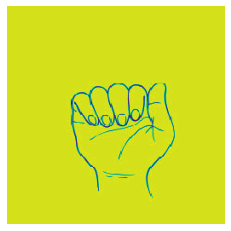

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[8]


In [ ]:
img_path = './drive/MyDrive/TestImg.jpg'
img = load_img(img_path, target_size=(256,256), grayscale=True, color_mode='grayscale')
img = img_to_array(img)
image_array = tf.expand_dims(img,0)


img = img.reshape(256,256)
plt.imshow(img)
plt.axis('off')

plt.show()

y_pred = model.predict_classes(image_array)
print(y_pred)